# Nikita Kiran More(Batch 25 Jan)

# PCA

# Task 1: Exploratory Data Analysis (EDA):

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
df = pd.read_csv('wine.csv')

In [4]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

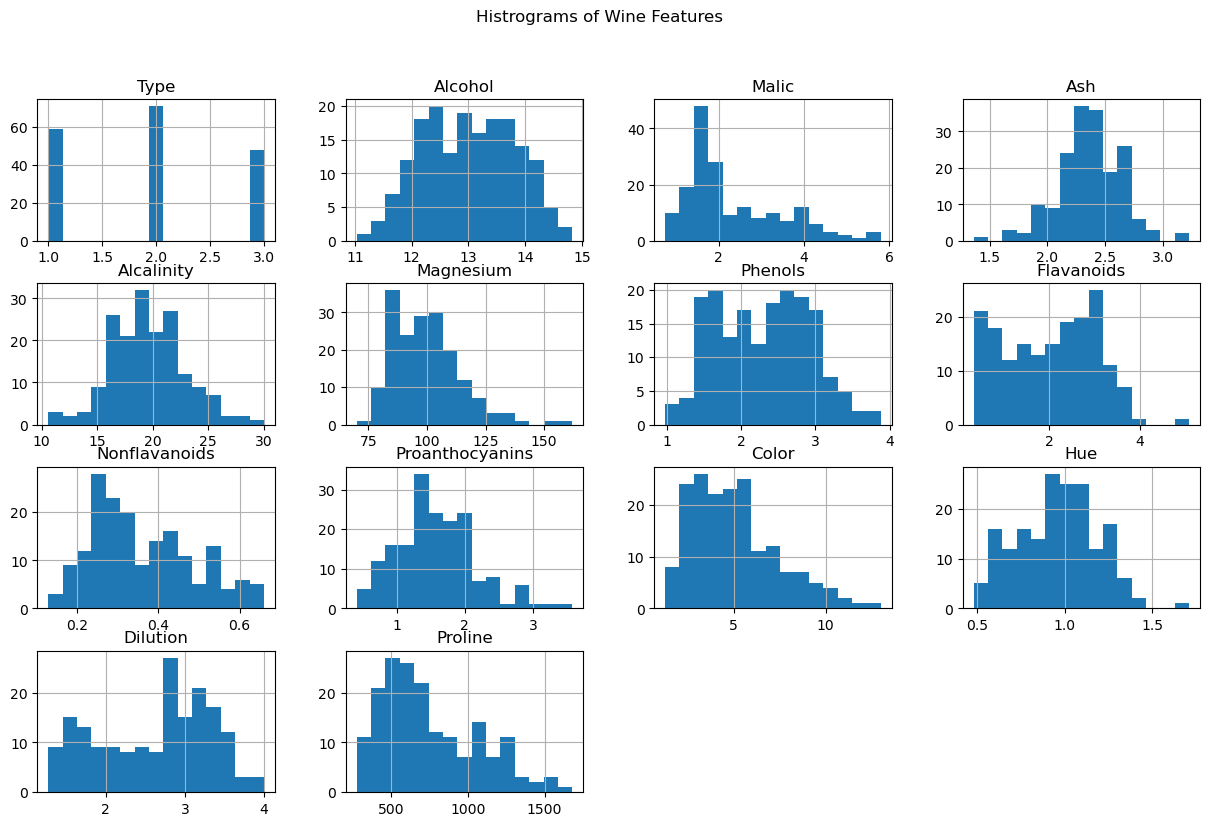

In [12]:
df.hist(bins=15, figsize=(15,9))
plt.suptitle('Histrograms of Wine Features')
plt.show()

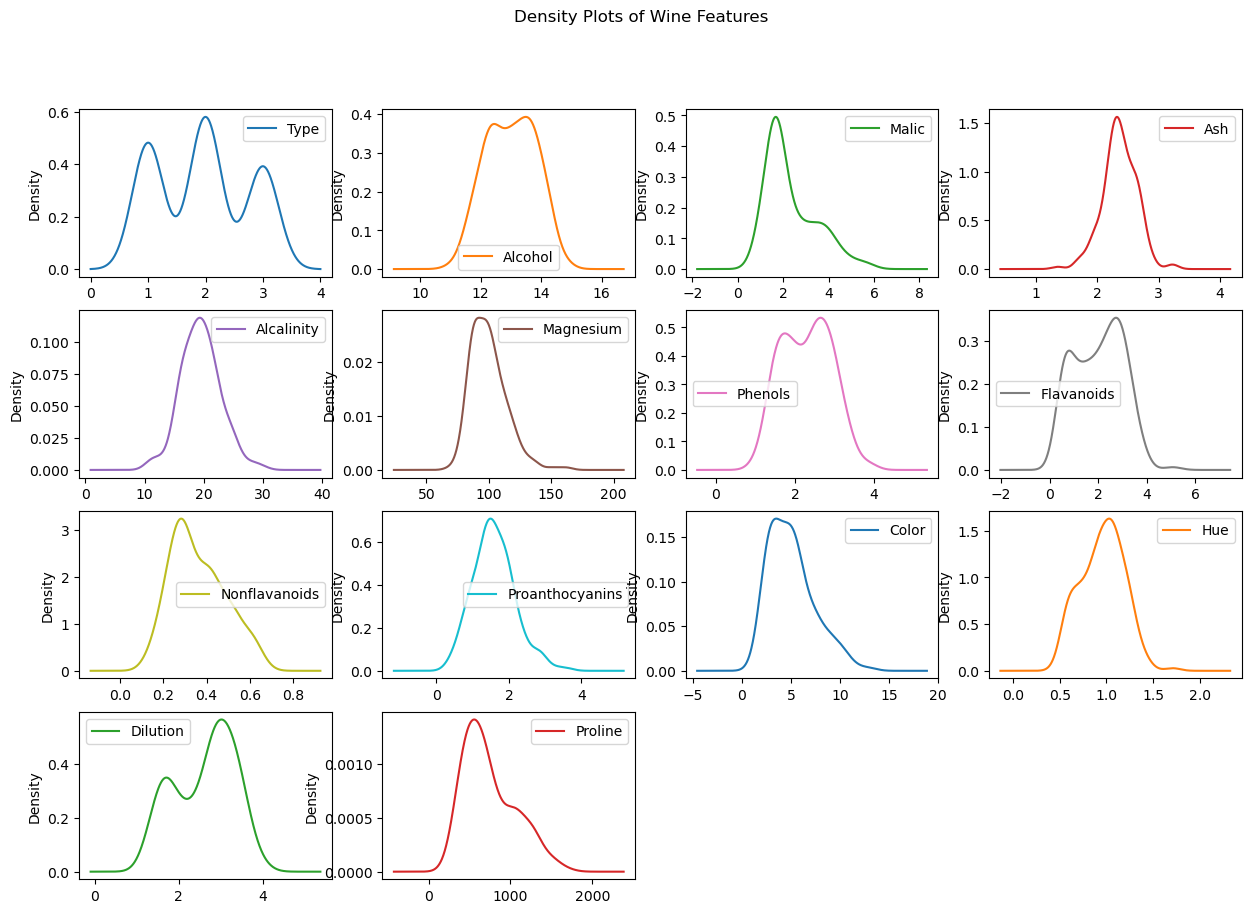

In [13]:
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, figsize=(15, 10))
plt.suptitle('Density Plots of Wine Features')
plt.show()

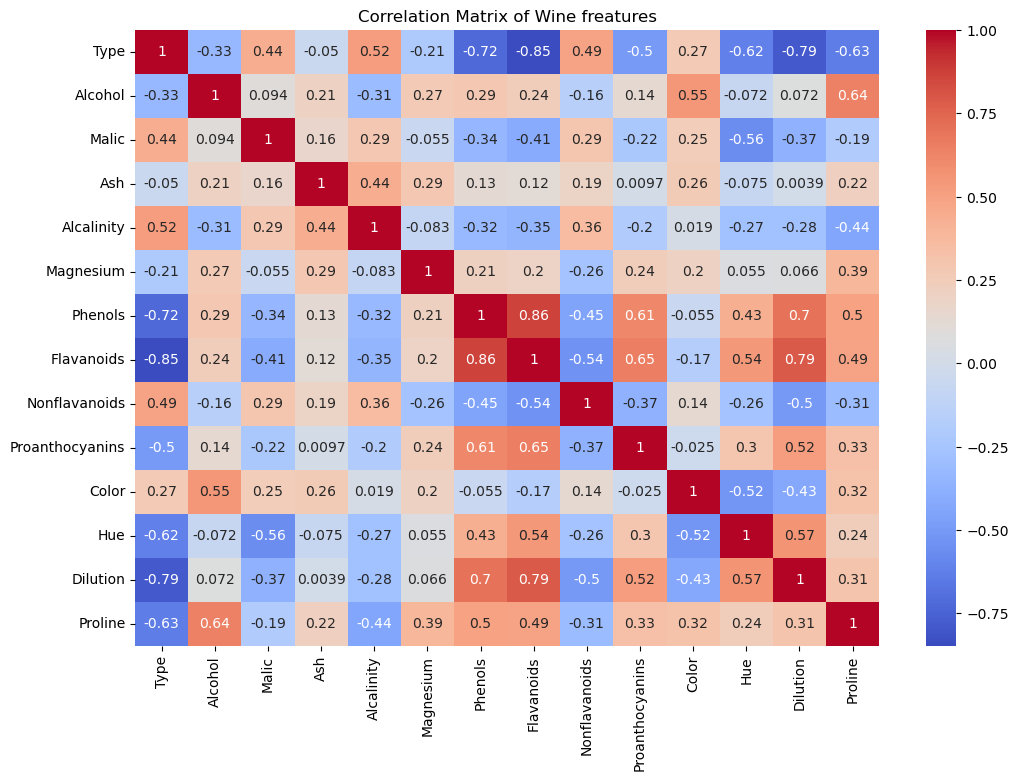

In [15]:
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix of Wine freatures')
plt.show()

# Task 2: Dimensionality Reduction with PCA:

In [18]:
scaler = StandardScaler()
scaler_data = scaler.fit_transform(df.drop('Type', axis=1))

In [19]:
scaler_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [21]:
pca= PCA()
pca.fit(scaler_data)

PCA()

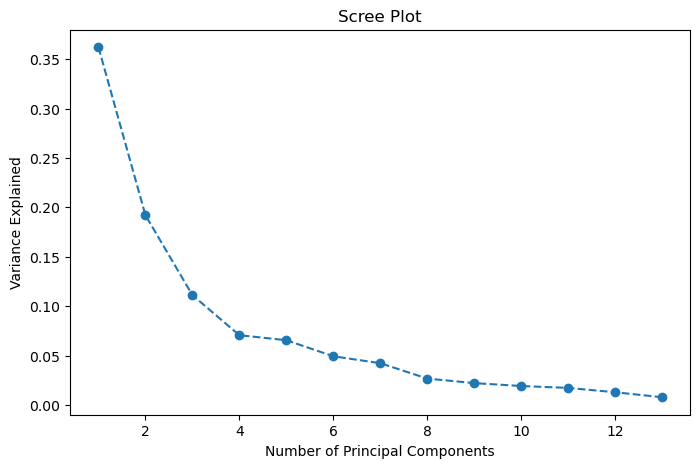

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.show()

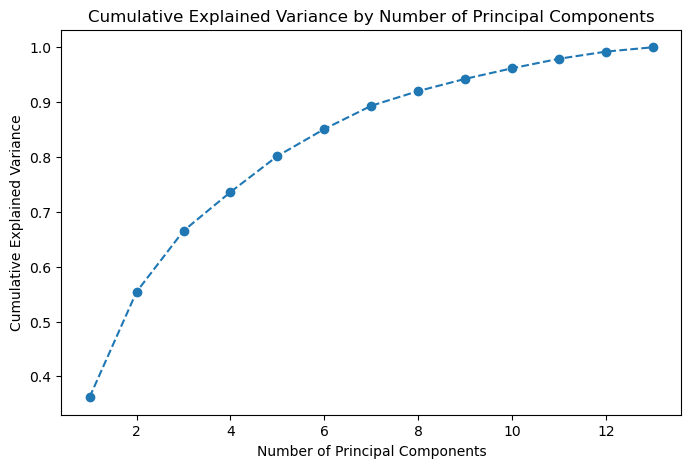

In [27]:
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_var_exp) + 1), cum_var_exp, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()
     

In [28]:
n_components = np.argmax(cum_var_exp >= 0.9) + 1
print(f"Optimal number of components: {n_components}")


Optimal number of components: 8


In [30]:
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaler_data)

In [32]:
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(n_components)])


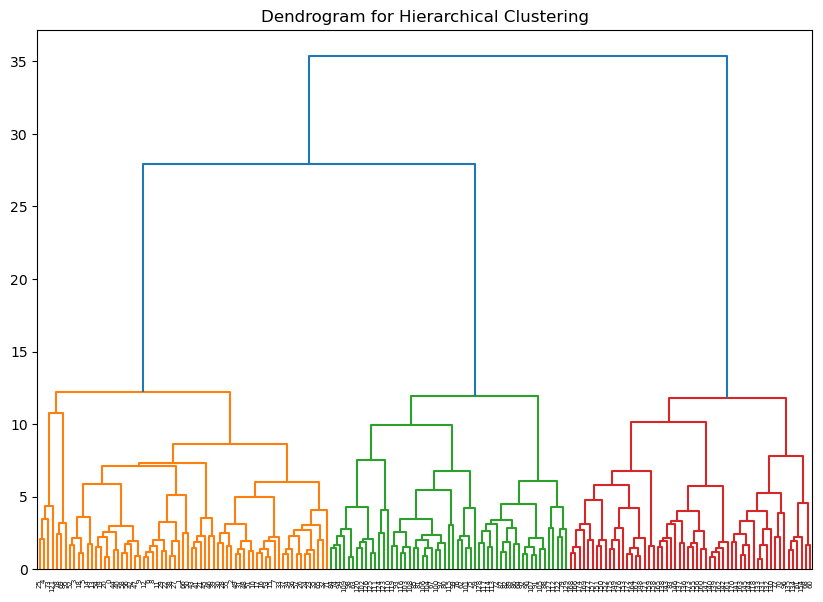

In [33]:
linked = linkage(pca_df, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# Task 3: Clustering with Original Data

In [35]:
import warnings
warnings.filterwarnings("ignore")

kmeans = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans.fit_predict(scaler_data)
     

In [37]:
kmeans

KMeans(n_clusters=3, random_state=42)

In [38]:
clusters_original

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [39]:
df['Cluster_Original']=clusters_original

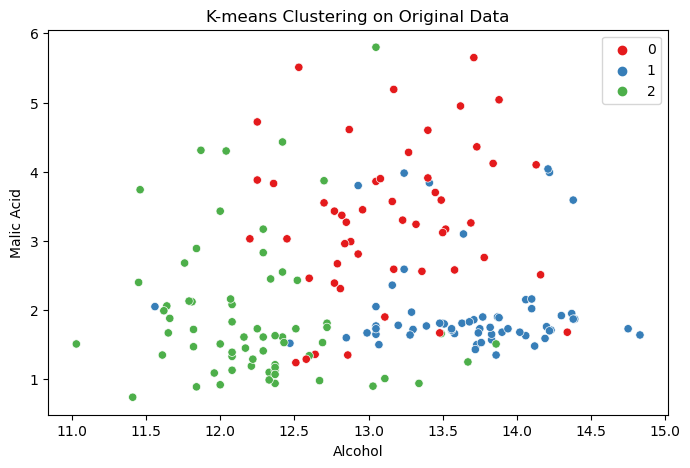

In [40]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Alcohol'], y=df['Malic'], hue=clusters_original, palette='Set1')
plt.title('K-means Clustering on Original Data')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.show()
     

In [42]:
silhouette_original = silhouette_score(scaler_data, clusters_original)
davies_bouldin_original = davies_bouldin_score(scale_data, clusters_original)
print(f'Silhouette Score (Original Data): {silhouette_original}')
print(f'Davies-Bouldin Index (Original Data): {davies_bouldin_original}')

Silhouette Score (Original Data): 0.2848589191898987
Davies-Bouldin Index (Original Data): 1.3891879777181648


# Task 4: Clustering with PCA Data

In [43]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_data)

In [44]:
kmeans_pca

KMeans(n_clusters=3, random_state=42)

In [45]:
clusters_pca

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [47]:
pca_df['Cluster_PCA'] = clusters_pca

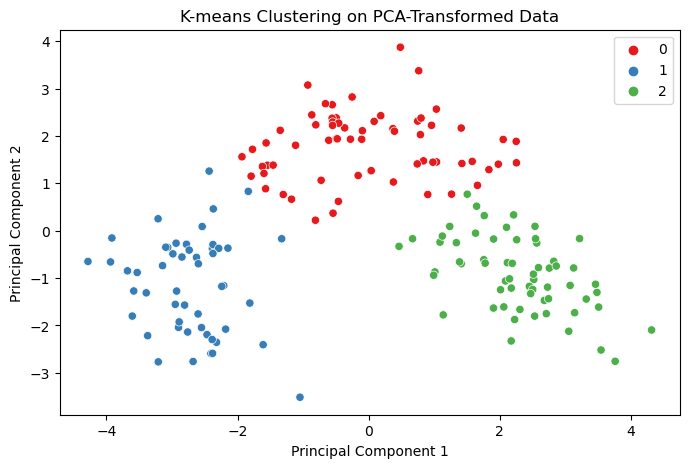

In [48]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=clusters_pca, palette='Set1')
plt.title('K-means Clustering on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [49]:
silhouette_pca = silhouette_score(pca_data, clusters_pca)
davies_bouldin_pca = davies_bouldin_score(pca_data, clusters_pca)
print(f'Silhouette Score (PCA Data): {silhouette_pca}')
print(f'Davies-Bouldin Index (PCA Data): {davies_bouldin_pca}')

Silhouette Score (PCA Data): 0.3149696954705562
Davies-Bouldin Index (PCA Data): 1.2668818314972172


# Task 5: Comparison and Analysis

In [50]:
print("Clustering Comparison:")
print(f"Silhouette Score - Original Data: {silhouette_original}, PCA Data: {silhouette_pca}")
print(f"Davies-Bouldin Index - Original Data: {davies_bouldin_original}, PCA Data: {davies_bouldin_pca}")
     

Clustering Comparison:
Silhouette Score - Original Data: 0.2848589191898987, PCA Data: 0.3149696954705562
Davies-Bouldin Index - Original Data: 1.3891879777181648, PCA Data: 1.2668818314972172


In [51]:
if silhouette_pca > silhouette_original:
    print("PCA improves clustering by creating more distinct clusters.")
else:
    print("PCA does not improve clustering; clusters are more distinct in the original data.")
     

PCA improves clustering by creating more distinct clusters.


In [52]:
print("Trade-offs Analysis:")
print("PCA reduces dimensionality and can speed up clustering, but may lose some information, affecting clustering performance.")
print("Using the original dataset retains all information but might be computationally expensive and harder to interpret with many features.")
     

Trade-offs Analysis:
PCA reduces dimensionality and can speed up clustering, but may lose some information, affecting clustering performance.
Using the original dataset retains all information but might be computationally expensive and harder to interpret with many features.


# Task 6: Conclusion and Insights